In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl


In [6]:
data= pd.read_excel("C:/Users/Phoni/Downloads/Churn_Modelling (2).xlsx")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093,5094,15787255,Manfrin,650,Germany,Female,55.0,2,140891.46,3,1.0,1.0,179834.45,1
5094,5095,15617166,Ritchie,610,France,Male,37.0,0,0.00,1,1.0,0.0,114514.64,0
5095,5096,15742442,Udegbulam,705,Spain,Female,46.0,5,89364.91,1,0.0,1.0,139162.15,0
5096,5097,15758692,Kao,669,France,Female,29.0,7,146011.40,1,0.0,0.0,50249.16,0


In [8]:
# Check for missing values
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [12]:
#data['Age'].fillna(data['Age'].mean(), inplace=True)
data['HasCrCard'].fillna(data['HasCrCard'].mean(), inplace=True)
data['IsActiveMember'].fillna(data['IsActiveMember'].mean(), inplace=True)

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## What is the overall distribution of churned and non-churned customers in the dataset?

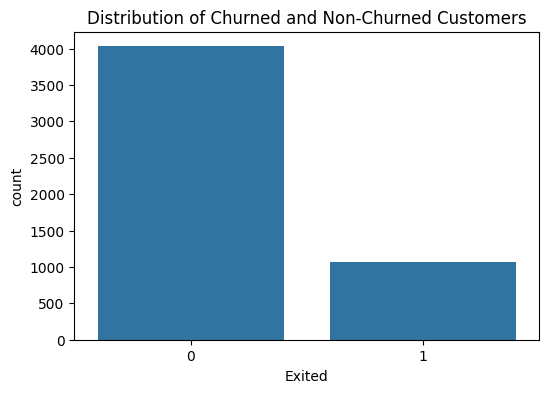

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Churned and Non-Churned Customers')
plt.show()

### How do credit scores vary between customers who churned and those who did not?

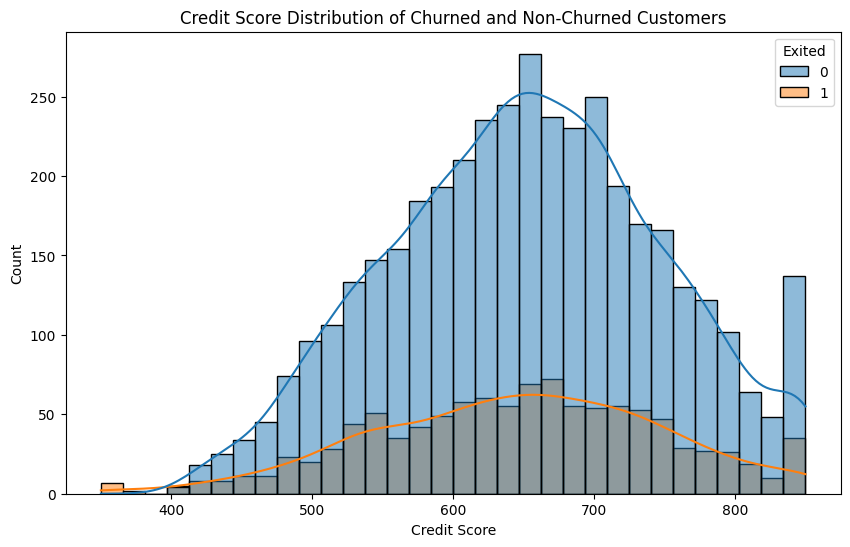

In [40]:
# 2. Credit scores variation between customers who churned and those who did not
# Histogram for Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(x='CreditScore', hue='Exited', data=data, kde=True)
plt.title('Credit Score Distribution of Churned and Non-Churned Customers')
plt.xlabel('Credit Score')
plt.show()


### How does the geographical distribution of customers relate to churn rates?
### Is there a correlation between gender and customer churn?

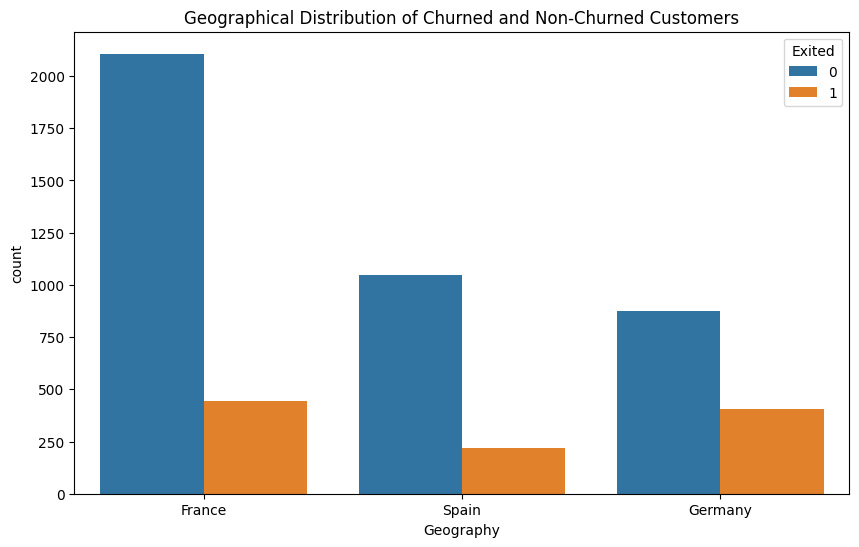

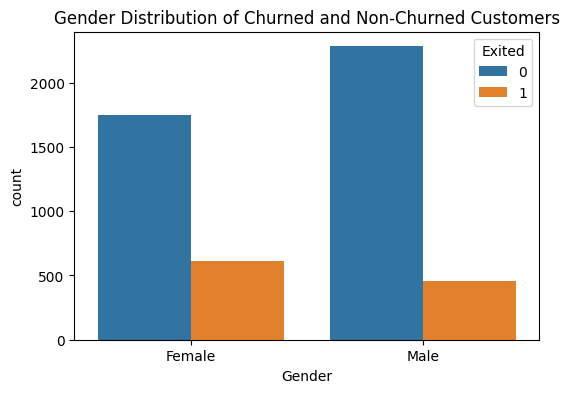

In [31]:
# Demographic Factors
# 3. Geographical distribution of customers vs. churn rates
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Geographical Distribution of Churned and Non-Churned Customers')
plt.show()

# 4. Correlation between gender and customer churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Gender Distribution of Churned and Non-Churned Customers')
plt.show()

### Does the tenure of a customer influence their likelihood to churn?
### Is there a relationship between the number of bank products a customer uses and their likelihood to churn?

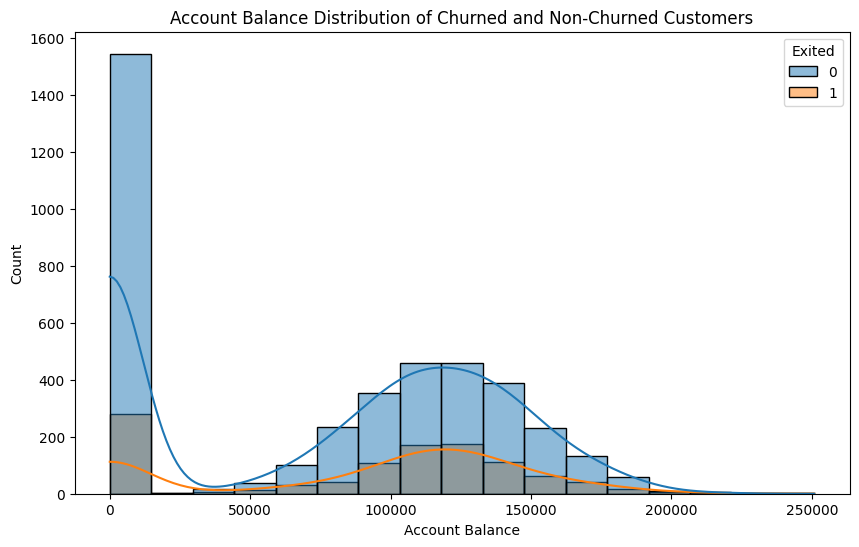

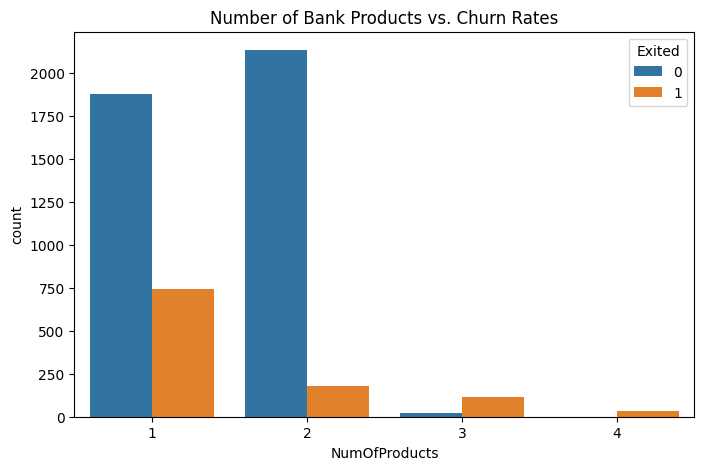

In [39]:
# Financial Profile
# 5. Relationship between account balances and churn rates
# Histogram for Account Balance
plt.figure(figsize=(10, 6))
sns.histplot(x='Balance', hue='Exited', data=data, kde=True)
plt.title('Account Balance Distribution of Churned and Non-Churned Customers')
plt.xlabel('Account Balance')
plt.show()


# 6. Relationship between the number of bank products and likelihood to churn
plt.figure(figsize=(8, 5))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Number of Bank Products vs. Churn Rates')
plt.show()

### Does the tenure of a customer influence their likelihood to churn?
### How does the possession of a credit card or active membership status correlate 

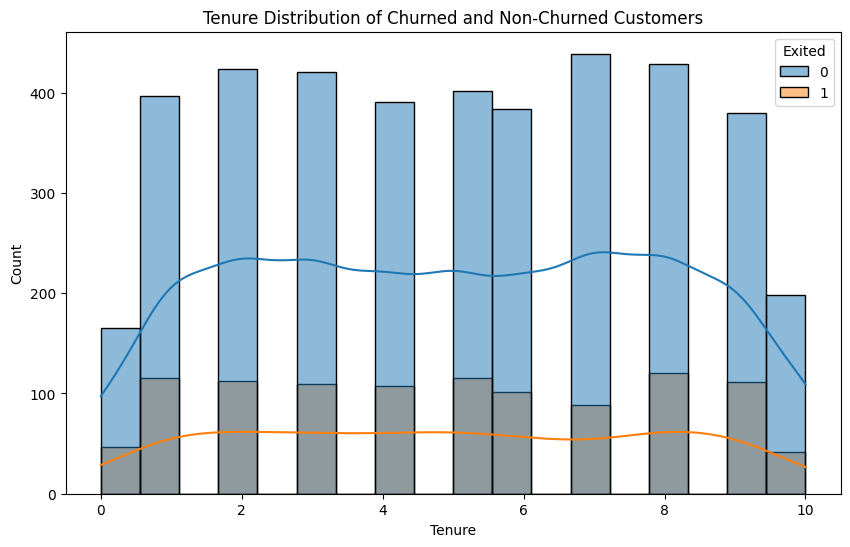

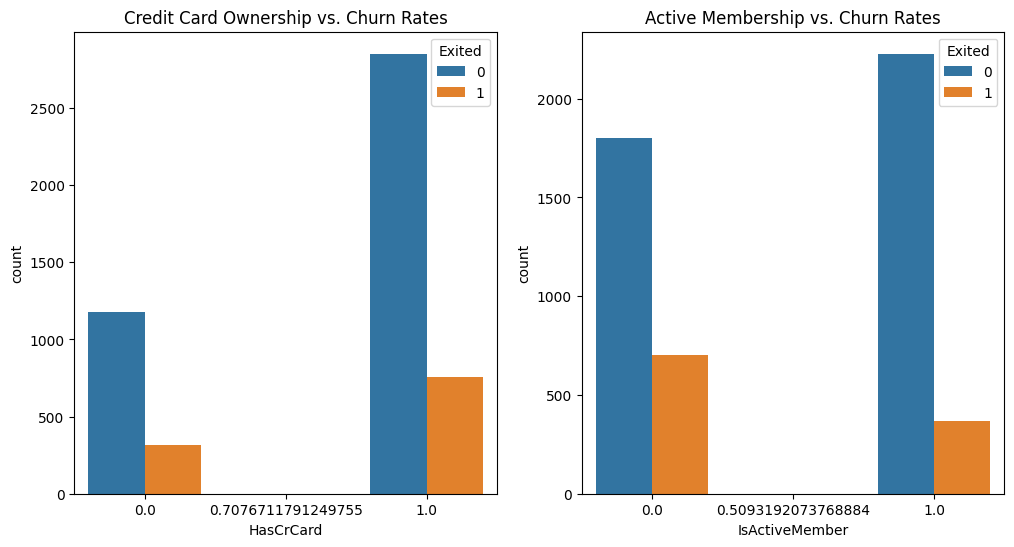

In [38]:
# Customer Engagement
# 7. Influence of customer tenure on likelihood to churn
# Histogram for Tenure
plt.figure(figsize=(10, 6))
sns.histplot(x='Tenure', hue='Exited', data=data, kde=True)
plt.title('Tenure Distribution of Churned and Non-Churned Customers')
plt.xlabel('Tenure')
plt.show()


# 8. Correlation between possession of a credit card or active membership and churn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='HasCrCard', hue='Exited', data=data)
plt.title('Credit Card Ownership vs. Churn Rates')

plt.subplot(1, 2, 2)
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Active Membership vs. Churn Rates')

plt.show()

### Are there specific age groups more prone to churn?

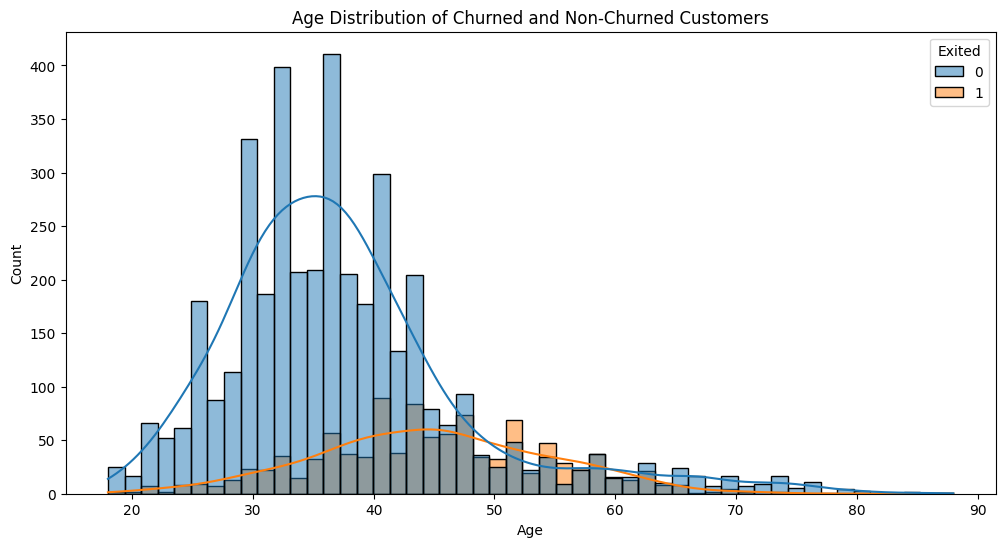

In [34]:
# Age and Salary
# 9. Age groups prone to churn
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Exited', data=data, kde=True)
plt.title('Age Distribution of Churned and Non-Churned Customers')
plt.show()

### Does the estimated salary of a customer impact their decision to churn?

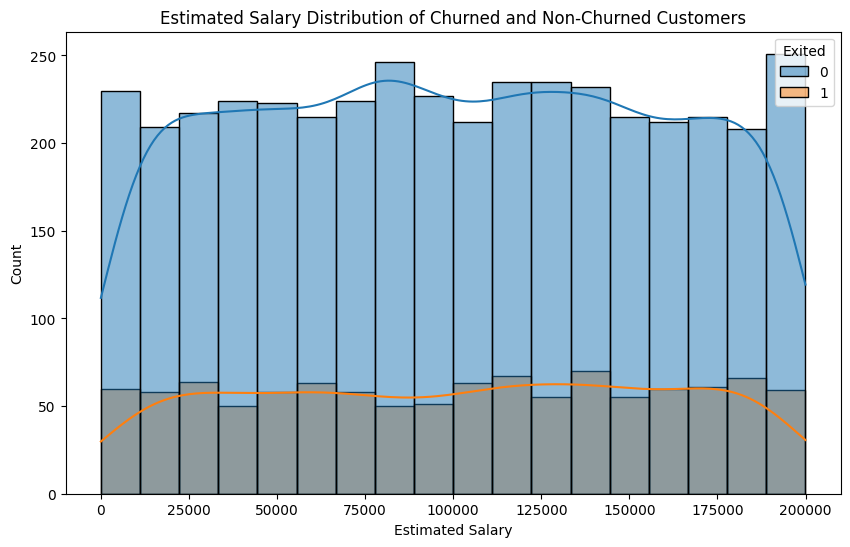

In [37]:
# Histogram for Estimated Salary
plt.figure(figsize=(10, 6))
sns.histplot(x='EstimatedSalary', hue='Exited', data=data, kde=True)
plt.title('Estimated Salary Distribution of Churned and Non-Churned Customers')
plt.xlabel('Estimated Salary')
plt.show()
